In [2]:
# import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ElMehdi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [8]:
df = pd.read_csv(r"C:\Users\ElMehdi\Documents\Projects\Super-store-data-analysis\Sample - Superstore.csv", encoding='ISO-8859-1')

In [9]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

##### No null value found

In [19]:
# cheking for duplicates

if df.duplicated().sum() > 0 :
    print("Duplicates exist")
else:
    print("No duplicates found")


No duplicates found


#### Customer Segmentation

In [33]:
# Types of customer

types_of_customer = df['Segment'].unique()
print(types_of_customer)

['Consumer' 'Corporate' 'Home Office']


In [35]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment':'Type of customer'})

In [36]:
print(number_of_customers)

  Type of customer  count
0         Consumer   5191
1        Corporate   3020
2      Home Office   1783


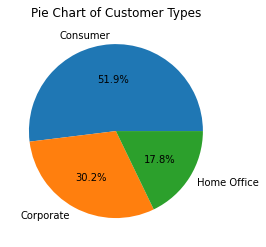

In [45]:
plt.pie(
    number_of_customers['count'],
    labels=number_of_customers['Type of customer'],
    autopct = '%1.1f%%'
)
plt.title("Pie Chart of Customer Types")
plt.show()

#### Customer Sales Insight

  Types of Customer   Total Sales
0          Consumer  1.161401e+06
1         Corporate  7.061464e+05
2       Home Office  4.296531e+05


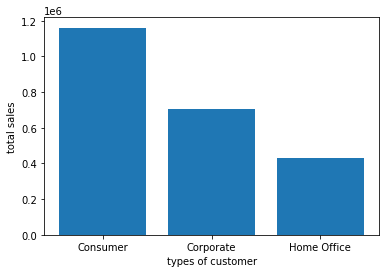

In [56]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment' : 'Types of Customer', 'Sales' : 'Total Sales'})

print(sales_per_segment)

plt.bar(sales_per_segment ['Types of Customer'], sales_per_segment['Total Sales'])
plt.xlabel('types of customer')
plt.ylabel('total sales')
plt.show()

### Exploring Customer loyalty

In [54]:
# customer order frequency

customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

In [63]:
# renaming order id

customers_order_frequency.rename(columns={'Order ID' : 'Total Order'}, inplace=True)

In [69]:
# sorting the total order desc

repeat_customers = customers_order_frequency[customers_order_frequency['Total Order'] >=1]

repeat_customers_sorted = repeat_customers.sort_values(by='Total Order', ascending = False)

print(repeat_customers_sorted.head(12).reset_index(drop = True))

   Customer ID        Customer Name      Segment  Total Order
0     WB-21850        William Brown     Consumer           37
1     PP-18955           Paul Prost  Home Office           34
2     JL-15835             John Lee     Consumer           34
3     MA-17560         Matt Abelman  Home Office           34
4     SV-20365          Seth Vernon     Consumer           32
5     JD-15895     Jonathan Doherty    Corporate           32
6     CK-12205  Chloris Kastensmidt     Consumer           32
7     EH-13765         Edward Hooks    Corporate           32
8     EP-13915           Emily Phan     Consumer           31
9     ZC-21910     Zuschuss Carroll     Consumer           31
10    AP-10915       Arthur Prichep     Consumer           31
11    LC-16870        Lena Cacioppo     Consumer           30


In [72]:
# Calculating customer sales

customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

# Sorting the customer sales

Top_spenders = customer_sales.sort_values(by = 'Sales', ascending=False)

print(Top_spenders)

    Customer ID    Customer Name      Segment      Sales
700    SM-20320      Sean Miller  Home Office  25043.050
741    TC-20980     Tamara Chand    Corporate  19052.218
621    RB-19360     Raymond Buch     Consumer  15117.339
730    TA-21385     Tom Ashbrook  Home Office  14595.620
6      AB-10105    Adrian Barton     Consumer  14473.571
..          ...              ...          ...        ...
659    RS-19870       Roy Skaria  Home Office     22.328
508    MG-18205  Mitch Gastineau    Corporate     16.739
145    CJ-11875     Carl Jackson    Corporate     16.520
456    LD-16855     Lela Donovan    Corporate      5.304
760    TS-21085    Thais Sissman     Consumer      4.833

[793 rows x 4 columns]


#### Exploring Shipping Strategies

In [77]:
shipping_model = df['Ship Mode'].value_counts().reset_index()

shipping_model = shipping_model.rename(columns={'index':'Use Frequency','Ship Mode': 'Mode of Shipement'})

print(shipping_model)

  Mode of Shipement  count
0    Standard Class   5968
1      Second Class   1945
2       First Class   1538
3          Same Day    543
